## Analysis of XRP data based on rolling averages

In [1]:
import pandas as pd
import numpy as np

In [2]:
import re

In [3]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [4]:
import sys 
sys.path.append('../Data_storage/')
sys.path.append('../Code_Base')

In [5]:
import os

In [6]:
import warnings

In [7]:
from coin_information import *

In [8]:
from statsmodels.tsa.stattools import adfuller 

In [9]:
from matplotlib.pylab import rcParams 

In [10]:
rcParams['figure.figsize'] = 20,10

In [11]:
warnings.filterwarnings('ignore')

In [12]:
import datetime as dt
from datetime import datetime

### Get 5min XRP data

In [13]:
XRP = []
for myf in open('../Data_storage/XRP_5min_Freq.txt'):
    XRP.append(myf.replace('\n',''))

In [14]:
XRP_Data = []
for E in XRP:
    XRP_Temp = pd.read_csv('../Data_storage/Coin_Data_5min/{0}.csv'.format(E))
    XRP_Data.append(XRP_Temp)

In [15]:
XRP_Data = pd.concat(XRP_Data)

In [16]:
XRP_Data['datetime_real'] = XRP_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [17]:
XRP_Data = XRP_Data[XRP_Data['date'] != 0]

In [18]:
XRP_Data = XRP_Data[XRP_Data['volume'] != 0]

In [19]:
XRP_Data

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
0,0,0.024997,1424462400,0.024997,0.024997,0.024997,0.146700,0.003667,0.024997,2015-02-20 20:00:00
286,286,0.024997,1424548200,0.024997,0.024997,0.024997,0.544199,0.013603,0.024997,2015-02-21 19:50:00
1678,1678,0.002500,1424965800,0.002500,0.002500,0.002500,19.999860,0.049993,0.002500,2015-02-26 15:50:00
2589,2589,0.024997,1425239100,0.024997,0.024997,0.024997,0.065440,0.001636,0.024997,2015-03-01 19:45:00
2994,2994,0.002250,1425360600,0.002250,0.002250,0.002250,500.000000,1.125000,0.002250,2015-03-03 05:30:00
3041,3041,0.009853,1425374700,0.009853,0.008335,0.008335,954.993891,9.295964,0.009734,2015-03-03 09:25:00
3042,3042,0.009171,1425375000,0.011335,0.009071,0.009874,2727.841978,25.470692,0.009337,2015-03-03 09:30:00
3043,3043,0.009490,1425375300,0.009490,0.009490,0.009490,938.280767,8.904284,0.009490,2015-03-03 09:35:00
3044,3044,0.009390,1425375600,0.011400,0.009390,0.009390,7318.611451,69.746087,0.009530,2015-03-03 09:40:00
3046,3046,0.009194,1425376200,0.009396,0.009194,0.009396,2525.843360,23.341989,0.009241,2015-03-03 09:50:00


In [20]:
Hour = 2
XRP_Data['2H_RA_on_Close'.format(Hour)] = XRP_Data['close'].rolling( Hour*12).mean()

In [21]:
XRP_Data['2H_RA_on_Close'] = XRP_Data['2H_RA_on_Close'].shift(1)

In [22]:
XRP_Data['high_percent_dif'] = (XRP_Data['high']-XRP_Data['2H_RA_on_Close'])/XRP_Data['2H_RA_on_Close'] 

In [36]:
XRP_Analysis_table = XRP_Data[-3000:]

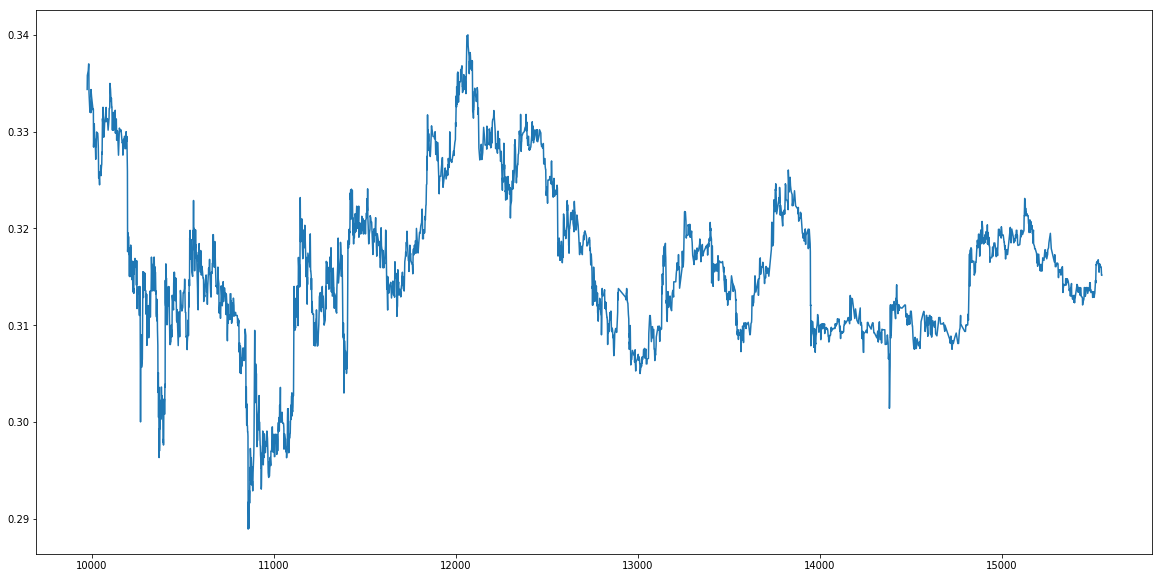

In [37]:
XRP_Analysis_table['close'].plot()

In [38]:
XRP_Analysis_table['low_percent_dif'] = (XRP_Analysis_table['low']-XRP_Analysis_table['2H_RA_on_Close'])/XRP_Analysis_table['2H_RA_on_Close'] 

In [39]:
XRP_Analysis_table['high_percent_dif'] = (XRP_Analysis_table['high']-XRP_Analysis_table['2H_RA_on_Close'])/XRP_Analysis_table['2H_RA_on_Close'] 

In [40]:
XRP_Analysis_table['low_percent_dif'].describe()

count    3000.000000
mean       -0.001181
std         0.008737
min        -0.056425
25%        -0.005205
50%        -0.001085
75%         0.003158
max         0.035061
Name: low_percent_dif, dtype: float64

In [41]:
XRP_Analysis_table['high_percent_dif'].describe()

count    3000.000000
mean        0.000627
std         0.008730
min        -0.043700
25%        -0.003955
50%        -0.000053
75%         0.004370
max         0.049239
Name: high_percent_dif, dtype: float64

In [42]:
(0.000627 + 0.001181)

0.001808

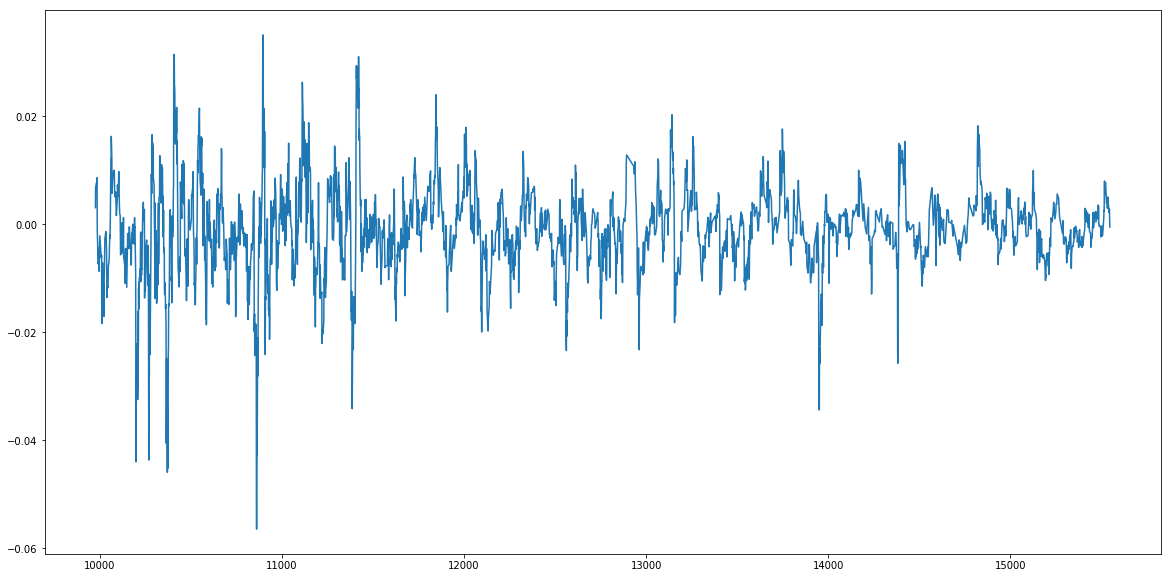

In [43]:
XRP_Analysis_table['low_percent_dif'].plot()

In [44]:
XRP_Analysis_table.index.min()

9976

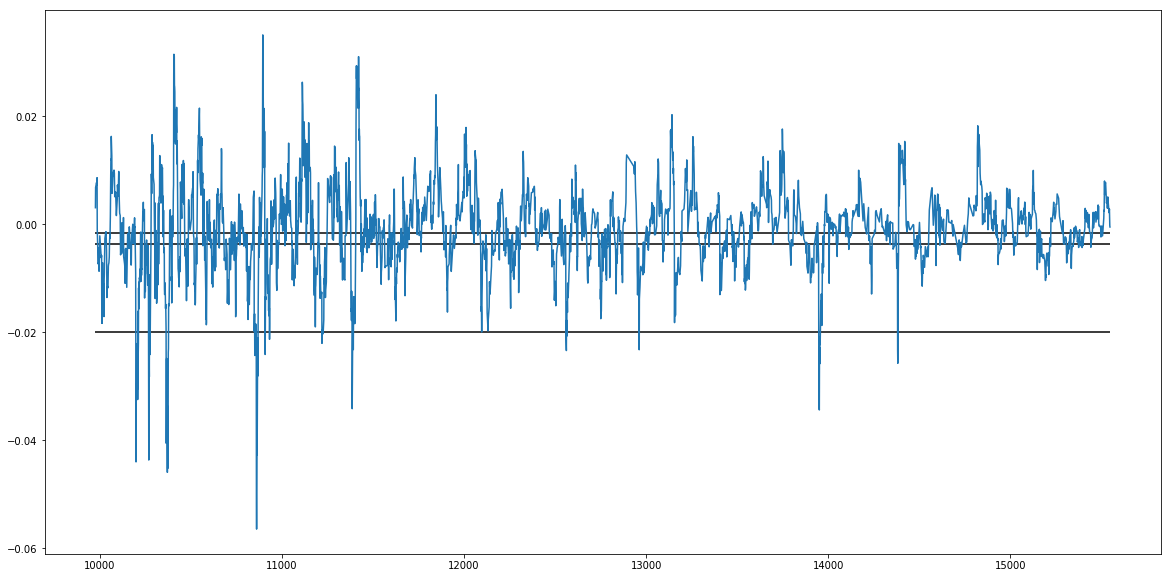

In [45]:
plt.plot(XRP_Analysis_table.index, XRP_Analysis_table['low_percent_dif'])
plt.hlines(y = -0.001641, xmin = XRP_Analysis_table.index.min(), xmax = XRP_Analysis_table.index.max())
plt.hlines(y = -0.003641, xmin = XRP_Analysis_table.index.min(), xmax = XRP_Analysis_table.index.max())
plt.hlines(y = -0.02, xmin = XRP_Analysis_table.index.min(), xmax = XRP_Analysis_table.index.max())




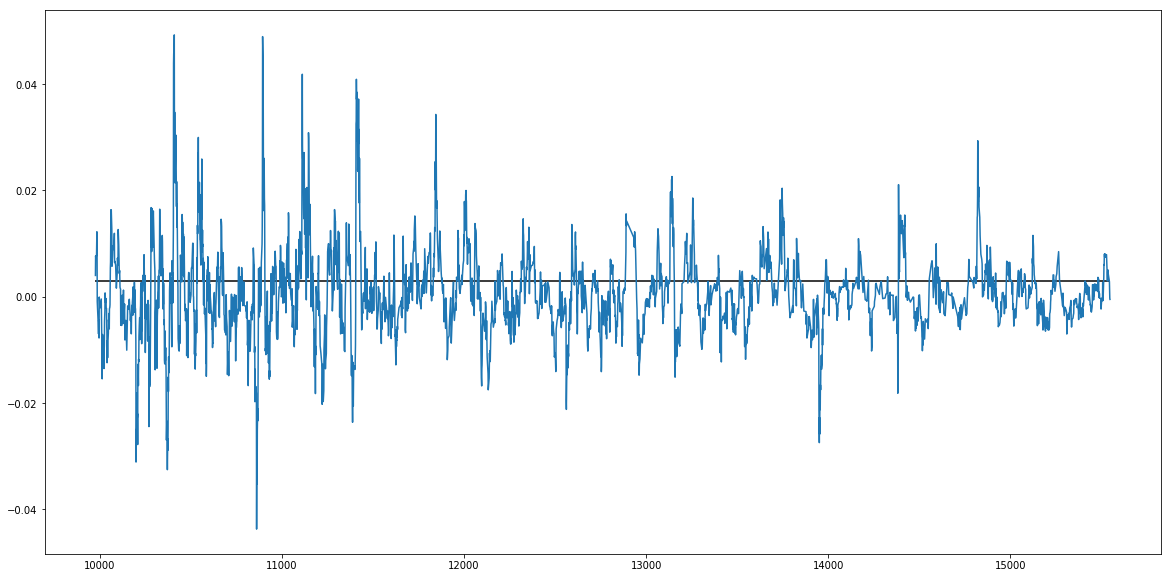

In [46]:
XRP_Analysis_table['high_percent_dif'].plot()

plt.hlines(y = 0.003, xmin = XRP_Analysis_table.index.min(), xmax = XRP_Analysis_table.index.max())


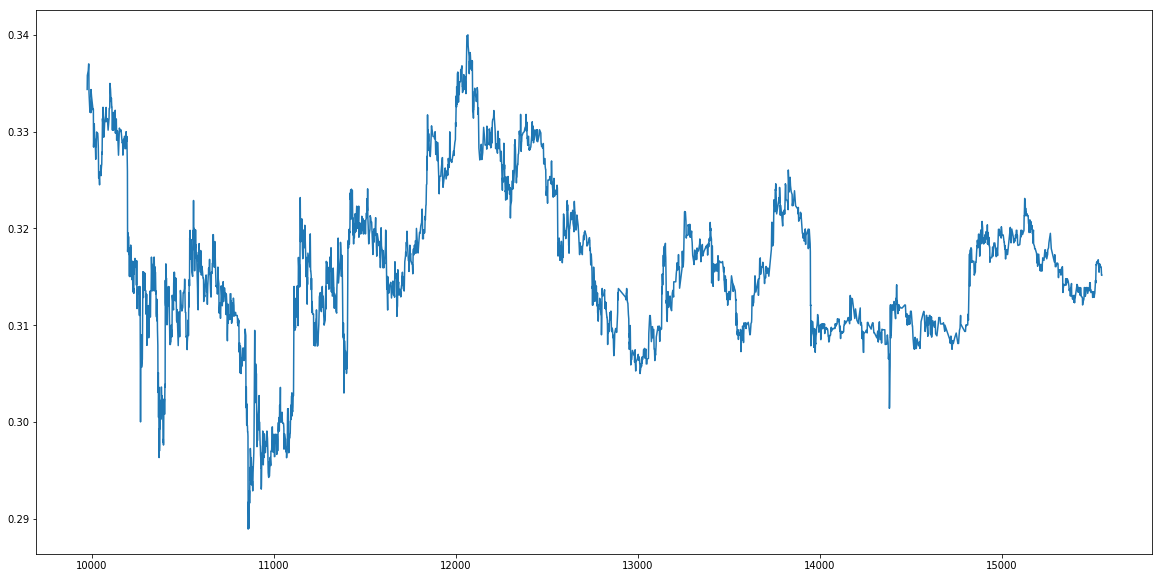

In [47]:
XRP_Analysis_table['close'].plot()

In [65]:
### Need to adjust for OPEN

look for pattern to see how many increases in a role (estimate 1-6 times due to 30min works)

In [64]:
XRP_Analysis_table

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,2H_RA_on_Close,high_percent_dif,low_percent_dif
9976,9976,0.334364,1563031200,0.334364,0.334053,0.334053,800.000215,267.490936,0.334364,2019-07-13 16:20:00,0.333030,0.004004,0.003071
9977,9977,0.335810,1563031500,0.335810,0.335530,0.335530,11.019000,3.698882,0.335682,2019-07-13 16:25:00,0.333252,0.007676,0.006836
9978,9978,0.335923,1563031800,0.335923,0.335810,0.335810,6.034078,2.026985,0.335923,2019-07-13 16:30:00,0.333480,0.007326,0.006988
9982,9982,0.336308,1563033000,0.336308,0.336308,0.336308,802.371000,269.844051,0.336308,2019-07-13 16:50:00,0.333734,0.007713,0.007713
9984,9984,0.337000,1563033600,0.337978,0.336313,0.336313,10195.353092,3445.404936,0.337939,2019-07-13 17:00:00,0.333898,0.012218,0.007231
9985,9985,0.337000,1563033900,0.337000,0.337000,0.337000,0.000741,0.000250,0.337000,2019-07-13 17:05:00,0.334116,0.008633,0.008633
9986,9986,0.334050,1563034200,0.334050,0.334050,0.334050,4.318274,1.442519,0.334050,2019-07-13 17:10:00,0.334357,-0.000918,-0.000918
9991,9991,0.332001,1563035700,0.332850,0.332001,0.332850,259.862802,86.282565,0.332031,2019-07-13 17:35:00,0.334457,-0.004806,-0.007344
9993,9993,0.332150,1563036300,0.332150,0.332150,0.332150,6.026802,2.001800,0.332150,2019-07-13 17:45:00,0.334490,-0.006998,-0.006998
9994,9994,0.333064,1563036600,0.333064,0.333064,0.333064,92.056421,30.660666,0.333064,2019-07-13 17:50:00,0.334530,-0.004381,-0.004381


In [62]:
time_event = {}
starting_asset = 50
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.0013 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.015
sell_limit = 0.006


while gold_available >= 0:
    
    for ind, df in XRP_Analysis_table[XRP_Analysis_table['datetime_real'] > '2017-07-07'].iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= drop_limit:
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )
                
                if ( df['2H_RA_on_Close'] - df['low'] ) / df['2H_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [63]:
time_event

{1563035700: (0, 150.30074757905103, 'brought', 0.33200101),
 1563037500: (50.15298384357325, 0.0, 'sell_profit', 0.33435290000000006),
 1563038400: (0.0, 150.0221465677402, 'brought', 0.33363526),
 1563041700: (49.108849546070346, 0.0, 'stop_loss_hit', 0.32799999999999996),
 1563042000: (0.0, 149.42265807005552, 'brought', 0.32799999999999996),
 1563042300: (48.83815306357623, 0.0, 'stop_loss_hit', 0.32750070000000003),
 1563042600: (0.0, 147.70333338509994, 'brought', 0.32998901),
 1563045300: (48.12868807353466, 0.0, 'stop_loss_hit', 0.3265),
 1563045600: (0.0, 146.2409949650571, 'brought', 0.32844709999999994),
 1563047100: (48.27792768142339, 0.0, 'sell_profit', 0.33078739),
 1563048000: (0.0, 146.07801497836266, 'brought', 0.32983315),
 1563056700: (48.46479290783773, 0.0, 'sell_profit', 0.33243823),
 1563072600: (0.0, 146.49513405993946, 'brought', 0.33016703000000003),
 1563077400: (48.56988729015228, 0.0, 'sell_profit', 0.3322105),
 1563077700: (0.0, 146.95595586905992, 'broug

In [50]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [51]:
from collections import Counter

In [52]:
Counter(transation_log['action'])

Counter({'brought': 334, 'sell_profit': 248, 'stop_loss_hit': 85})

In [53]:
datetime.fromtimestamp(1561123500)

datetime.datetime(2019, 6, 21, 14, 25)

In [54]:
pd.options.display.max_rows = 30

## Digging into Stop-Loss

In [55]:
transation_log['date'] = transation_log.index

In [56]:
plot_table = XRP_Analysis_table.merge(transation_log, on ='date', how='left').head()

In [57]:
plot_table

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,2H_RA_on_Close,high_percent_dif,low_percent_dif,Gold,XRP_Amount,action,price_action_happened
0,9976,0.334364,1563031200,0.334364,0.334053,0.334053,800.000215,267.490936,0.334364,2019-07-13 16:20:00,0.333030,0.004004,0.003071,NaN,NaN,NaN,NaN
1,9977,0.335810,1563031500,0.335810,0.335530,0.335530,11.019000,3.698882,0.335682,2019-07-13 16:25:00,0.333252,0.007676,0.006836,NaN,NaN,NaN,NaN
2,9978,0.335923,1563031800,0.335923,0.335810,0.335810,6.034078,2.026985,0.335923,2019-07-13 16:30:00,0.333480,0.007326,0.006988,NaN,NaN,NaN,NaN
3,9982,0.336308,1563033000,0.336308,0.336308,0.336308,802.371000,269.844051,0.336308,2019-07-13 16:50:00,0.333734,0.007713,0.007713,NaN,NaN,NaN,NaN
4,9984,0.337000,1563033600,0.337978,0.336313,0.336313,10195.353092,3445.404936,0.337939,2019-07-13 17:00:00,0.333898,0.012218,0.007231,NaN,NaN,NaN,NaN


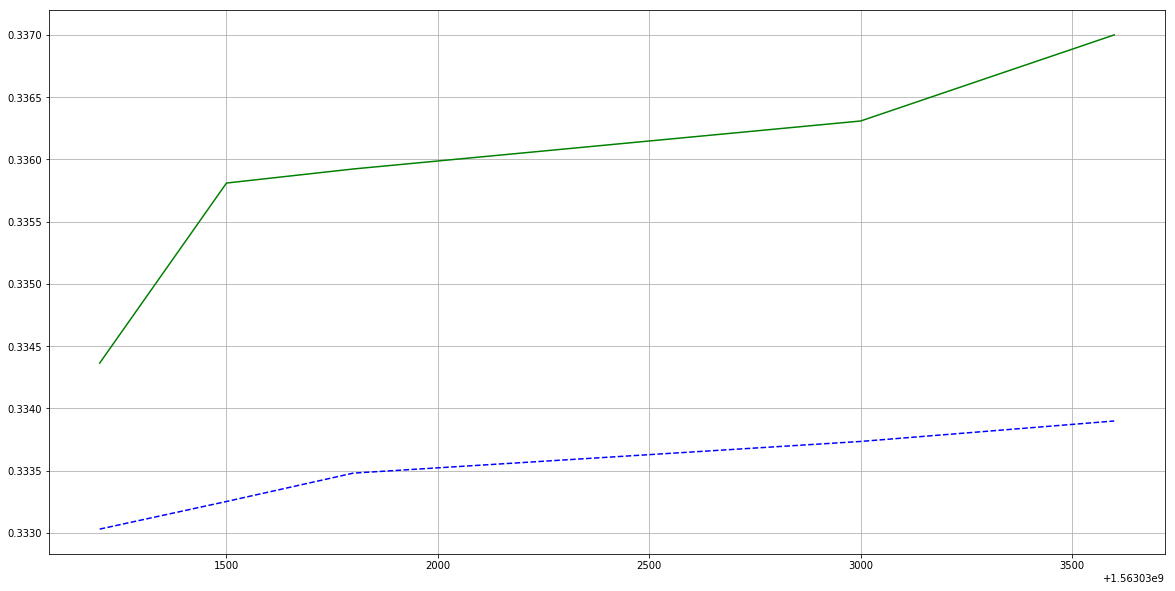

In [58]:
plt.plot(plot_table['date'], plot_table['2H_RA_on_Close'], 'b--')

plt.plot(plot_table['date'], plot_table['close'], 'g')

plt.grid()
plt.show()


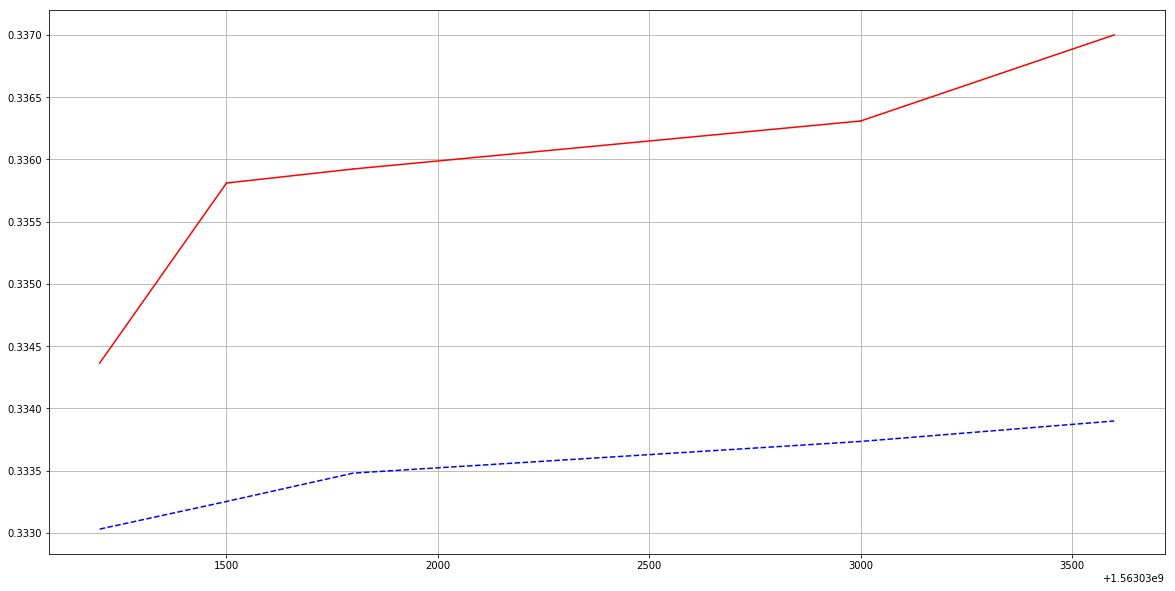

In [59]:
x = plot_table['date']
y = plot_table['close']
color = plot_table['action']



for x_p, x_p1, y_p, y_p1 , c_p in zip(x, x[1:] , y, y[1:], color):
    if c_p == 'sell_profit':
        plt.plot([x_p,x_p1], [y_p,y_p1], 'g-')
        
    elif c_p == 'brought':
        plt.plot([x_p,x_p1], [y_p,y_p1] ,'orange')
        
    else:
        plt.plot([x_p,x_p1], [y_p,y_p1] ,'r')


plt.plot(plot_table['date'], plot_table['2H_RA_on_Close'], 'b--')
plt.grid()
plt.show()



In [60]:
transation_log[40:60]

,Gold,XRP_Amount,action,price_action_happened,date
1563100500,0.00,142.0535,brought,0.317598,1563100500
1563100800,44.48,0.0000,stop_loss_hit,0.313739,1563100800
1563101100,0.00,140.9165,brought,0.315007,1563101100
1563101400,44.72,0.0000,stop_loss_hit,0.317980,1563101400
1563101700,0.00,141.6774,brought,0.315008,1563101700
1563102000,44.55,0.0000,stop_loss_hit,0.315100,1563102000
1563102300,0.00,139.8538,brought,0.317933,1563102300
1563102600,44.13,0.0000,stop_loss_hit,0.316205,1563102600
1563102900,0.00,138.8399,brought,0.317242,1563102900
1563103200,44.10,0.0000,sell_profit,0.318276,1563103200


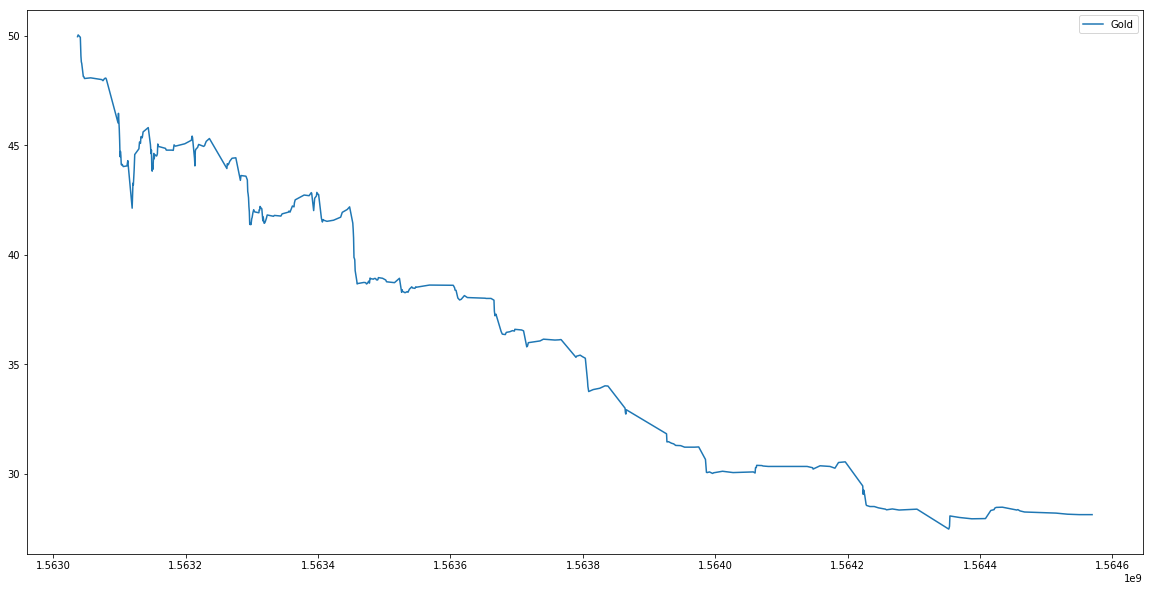

In [61]:
transation_log[transation_log['action'] != 'brought'][['Gold']][:2000].plot()

In [129]:
transation_log.head()

,Gold,XRP_Amount,action,price_action_happened,date
1560845100,0.00,114.4881,brought,0.435853,1560845100
1560845700,50.08,0.0000,sell_profit,0.438305,1560845700
1560846000,0.00,114.3711,brought,0.437000,1560846000
1560846600,50.17,0.0000,sell_profit,0.439546,1560846600
1560854100,0.00,114.1858,brought,0.438500,1560854100


In [130]:
XRP_Analysis_table.tail()

,Unnamed: 0,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,2H_RA_on_Close,percent_dif,low_percent_dif,high_percent_dif
15536,15536,0.316326,1564699200,0.316326,0.316311,0.316311,13517.372909,4275.702020,0.316312,2019-08-01 23:40:00,0.314860,0.004608,0.004608,0.004655
15542,15542,0.316000,1564701000,0.316000,0.315656,0.315656,28069.290248,8869.561323,0.315988,2019-08-02 00:10:00,0.314980,0.002145,0.002145,0.003239
15544,15544,0.316000,1564701600,0.316000,0.316000,0.316000,103.387470,32.670411,0.316000,2019-08-02 00:20:00,0.315110,0.002822,0.002822,0.002822
15546,15546,0.315153,1564702200,0.315153,0.315153,0.315153,4.613868,1.454076,0.315153,2019-08-02 00:30:00,0.315241,-0.000277,-0.000277,-0.000277
15547,15547,0.315153,1564702500,0.315153,0.315153,0.315153,9995.386132,3150.078924,0.315153,2019-08-02 00:35:00,0.315311,-0.000501,-0.000501,-0.000501


In [131]:
transation_log.index.max()

1564581900

In [30]:
XRP_Analysis_table[XRP_Analysis_table['date'].isin(transation_log.index)]['date'].max()

1564584900

In [31]:
set(XRP_Analysis_table[XRP_Analysis_table['date'].isin(transation_log.index)]['date']) - set(transation_log.index)

set()

In [32]:
len(transation_log.index)

953

In [33]:
len(XRP_Analysis_table['date'])

8500

In [146]:
for_plotting = XRP_Analysis_table[['close','date','volume','datetime_real','2H_RA_on_Close']].merge(transation_log[transation_log['action'] != 'brought'], left_on= 'date', right_index =True, how='left')

In [147]:
for_plotting['datetime_real'].min()

Timestamp('2019-06-18 09:05:00')

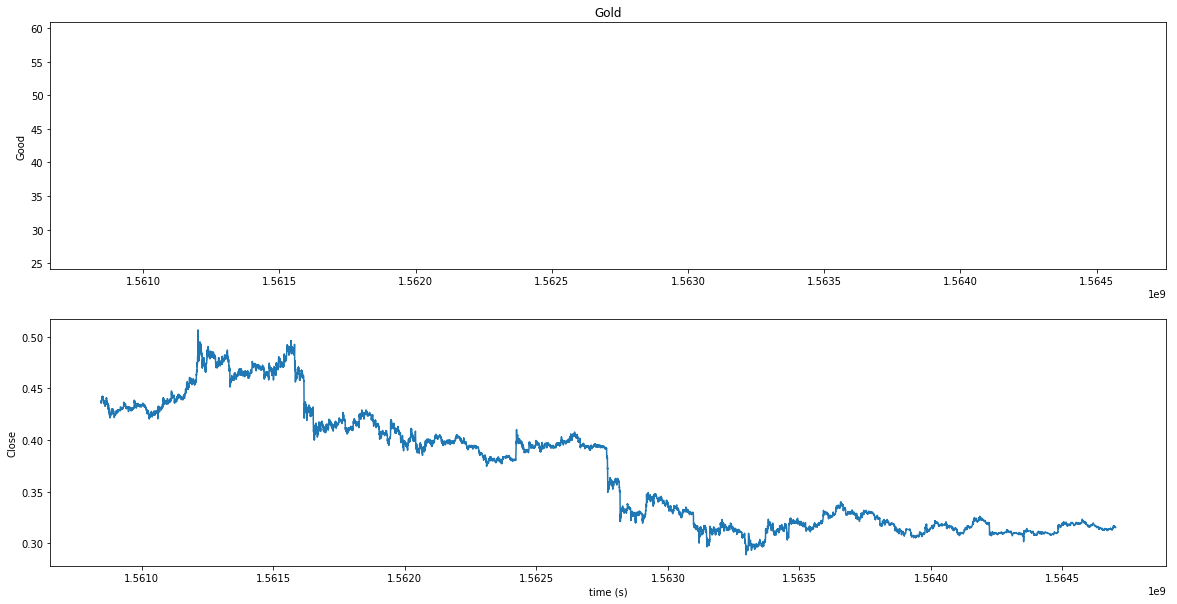

In [148]:
y1 = for_plotting['Gold']
y2 = for_plotting['close']

x = for_plotting['date']

plt.subplot(2, 1, 1)
plt.plot(x, y1, '-')
plt.title('Gold')
plt.ylabel('Good')

plt.subplot(2, 1, 2)
plt.plot(x, y2, '-')
plt.xlabel('time (s)')
plt.ylabel('Close')

plt.show()

In [ ]:
for_plotting[['date','2H_RA_on_Close','4_Data_Points_On_Close','close']].set_index('date').plot()